Example 1: Synthetic data

In this page we will look at generating synthetic data on which learning algorithms may be applied.

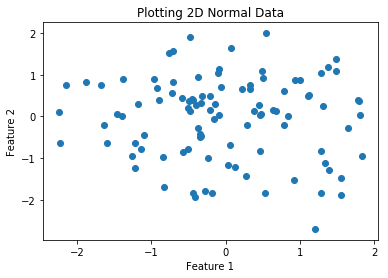

In [8]:
# loading numpy for data processing
import numpy as np

# Loading matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Loading K-NN classifier
from sklearn.neighbors import KNeighborsClassifier

# Loading pandas for loading dataset into dataframe
import pandas as pd

# Loading datasets for iris dataset
from sklearn import datasets

#Generating 2-dimensional normally distributed data

#specifying mean and covariance parameters
mean = [0, 0]
cov = [[1, 0], [0,1]]

#generating normal data
x, y = np.random.multivariate_normal(mean, cov, 100).T

#plotting the 2-dimensional data
plt.title('Plotting 2D Normal Data')
plt.scatter(x, y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [9]:
#Generating 2-dimensional data for a two class problem

#specifying parameters for class 1 data
class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

#specifying parameters for class 2 data
class2Mean = [3, 3]
class2Cov = [[1, 0], [0,1]]

#generating normal data
class1x, class1y = np.random.multivariate_normal(class1Mean, class1Cov, 100).T
class2x, class2y = np.random.multivariate_normal(class2Mean, class2Cov, 100).T

#plotting the 2-class data
plt.title('Plotting 2-dimensional 2-class data')
plt.scatter(class1x, class1y, color = 'b', label = 'Class 1')
plt.scatter(class2x, class2y, color = 'r', label = 'Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

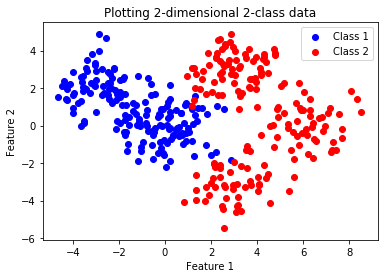

In [10]:
#Generating 2-dimensional data for a two class problem using mixture of Gaussians

#specifying parameters for class 1 data
class1G1Mean = [0, 0]
class1G2Mean = [-3, 2]
class1G1Cov = [[1, 0], [0,1]]
class1G2Cov = [[1, 0], [0,1]]

#specifying parameters for class 2 data
class2G1Mean = [3, 3]
class2G2Mean = [6, 0]
class2G3Mean = [3, -3]
class2G1Cov = [[1, 0], [0,1]]
class2G2Cov = [[1, 0], [0,1]]
class2G3Cov = [[1, 0], [0,1]]


#generating normal data
class1G1x, class1G1y = np.random.multivariate_normal(class1G1Mean, class1G1Cov, 100).T
class1G2x, class1G2y = np.random.multivariate_normal(class1G2Mean, class1G2Cov, 75).T

class2G1x, class2G1y = np.random.multivariate_normal(class2G1Mean, class2G1Cov, 75).T
class2G2x, class2G2y = np.random.multivariate_normal(class2G2Mean, class2G2Cov, 50).T
class2G3x, class2G3y = np.random.multivariate_normal(class2G3Mean, class2G1Cov, 50).T

#combining the different groups
class1x = np.append(class1G1x, class1G2x)
class1y = np.append(class1G1y, class1G2y)

class2x = np.append(class2G1x, class2G2x)
class2x = np.append(class2x, class2G3x)
class2y = np.append(class2G1y, class2G2y)
class2y = np.append(class2y, class2G3y)

#Plotting the 2-class data
plt.title('Plotting 2-dimensional 2-class data')
plt.scatter(class1x, class1y, color = 'b', label = 'Class 1')
plt.scatter(class2x, class2y, color = 'r', label = 'Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [13]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

X,y = np.append(class1x,class2x),np.append(class1y,class2y)

# Splitting the data into training and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=175)

In [12]:
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.02623029 -2.12892613  1.53964467 -3.03338443  3.05010958 -2.12890338
  4.17355725  4.13195934  2.12272651  2.5826843   1.24246409  0.73454363
 -1.71951642  3.29606941  3.69366397  2.58696825  0.45965474 -2.71306219
 -4.25210075 -2.48233273  0.21535438  0.91157298  2.47016253  1.34480951
  4.89402368  1.77826293  3.65398621  4.36840372 -0.07263175 -4.00272896
 -1.85484736 -0.96438054 -0.59293653  6.80404875  2.46997337  1.17646042
  0.13591838  2.40440501  3.10721441  3.48686588  1.1702445   4.31582668
  2.1172775   1.14542307  0.07844086 -1.70133723  3.56358439  2.94860719
  3.09075888 -0.5807791   2.2948629   3.25294424 -1.95332433  1.98178735
  1.23959956  0.91422283  1.28563914  2.95704072  6.56892691 -2.74932304
 -3.00686242 -0.54475081 -2.53341962  2.20983727 -3.64447266  3.94112228
 -1.71957217  2.23081511  5.72341873  5.70288099  1.90848262  4.16829537
 -2.39903273 -1.38217577  5.74934252 -1.6502344  -0.62484911  1.32061775
  3.94290983  3.55468085 -2.28655016 -3.43250704 -1.74991306  0.88846313
  4.71014716  1.80369561  5.03060661 -3.52897548 -2.06505423  0.84689699
 -0.73565504 -4.62567592  8.50485041 -0.86031641  1.79007955 -0.49974273
  2.52847955  0.7958171  -3.77903991 -3.58262626  7.31276652  0.72635122
  2.81035911  3.70958857  6.30219393  2.82136707 -0.28920867  4.49171265
 -1.6900225   6.6731732   4.26949728 -4.47790423  5.3740732   0.04589566
 -3.09557371 -4.20360052 -1.72355001 -3.0234547  -1.5633161  -1.09036776
 -0.31919507 -3.40367667 -2.35285031  0.6154918  -2.49244235  4.76803505
 -0.17943667  4.56000726  2.54482714 -2.67072422 -3.98308695 -1.15394135
 -3.6277693   0.9257017   3.96606085  6.12693775  2.1341549  -4.37928076
  3.05783321 -0.11770313  6.30214144  2.08458382  7.68592816 -2.47170556
  0.65058304  3.47507135  3.1513908   6.45194379  4.88429049 -3.9843611
  6.39785612  4.08190621  3.20855452  1.92824181  1.01400353  2.37151269
 -2.66024044  5.35163319  2.78897816 -0.50958775  5.15503574  6.00360864
 -1.15545546  0.34745931  5.81556937  0.07756866  0.21261566  4.76216521
 -1.40522115 -0.42086407 -1.12490322  2.85869882  2.89317279 -1.13200593
  4.55176548 -0.80858884 -3.64337748 -1.77857126  5.62086742  7.06038729
 -1.21216002  4.00556306  1.29518314  5.35801501  0.27141291  3.83090358
 -1.93836164  3.27913867  5.59803848  4.06333523  6.42531243  2.48915134
 -0.47192992  7.53852591  0.81964131  4.72301871  1.24654894 -3.44058956
  2.57097765 -3.95616662  0.71654566  2.95833462 -0.77114477 -1.54387284
 -0.4189424  -2.21053839  1.66764503 -4.09979775  1.6053368   5.47501259].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.